# 🧙‍♂️ DSLR - Hogwarts Sorting Hat Algorithm

This notebook demonstrates the main components of the DSLR project, which recreates Hogwarts' Sorting Hat using a logistic regression classifier built from scratch.

## Overview

We'll explore the following components:
1. **Dataset Overview & Custom Statistical Analysis**
2. **Data Visualization & Feature Selection**
3. **Logistic Regression Implementation**
4. **Comparing Different Optimization Algorithms**
5. **Model Evaluation**

In [1]:
''' Prepare the environment for the project. '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append('..')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (9, 6)

## 1. Dataset Overview & Custom Statistical Analysis

- load the dataset 

In [2]:
train_dataset_path = '../../data/raw/dataset_train.csv'


df = pd.read_csv(train_dataset_path)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1600, 19)


,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


- use the custom `describe.py` implementation to analyze it.

In [3]:
from data.describe import ft_describe

custom_stats = ft_describe(df, is_bonus=True)

custom_stats

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000
range,1599.00000,129326.000000,1982.952486,21.908558,19.829525,18.759000,2178.885445,461.526611,20.748706,192.330881,18.234246,6.370222,35.620780,460.540000
iqr,799.50000,22299.750000,1014.323336,9.727365,10.163775,2.568000,832.574954,199.981183,3.606588,32.226418,4.601387,1.261526,18.100295,92.430000


- compare results with pandas built-in `describe()` method to verify accuracy.

In [4]:
pandas_stats = df.describe()

column = 'Astronomy'
comparison = pd.DataFrame({
    'Custom': custom_stats[column].loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
    'Pandas': pandas_stats[column]
})

comparison['Difference'] = comparison['Custom'] - comparison['Pandas']
comparison['% Diff'] = (comparison['Difference'] / comparison['Pandas'] * 100).round(6)

comparison

,Custom,Pandas,Difference,% Diff
count,1568.000000,1568.000000,0.0,0.0
mean,39.797131,39.797131,0.0,0.0
std,520.298268,520.298268,0.0,0.0
min,-966.740546,-966.740546,0.0,-0.0
25%,-489.551387,-489.551387,0.0,-0.0
50%,260.289446,260.289446,0.0,0.0
75%,524.771949,524.771949,0.0,0.0
max,1016.211940,1016.211940,0.0,0.0


- distribution of students across the four Hogwarts houses.

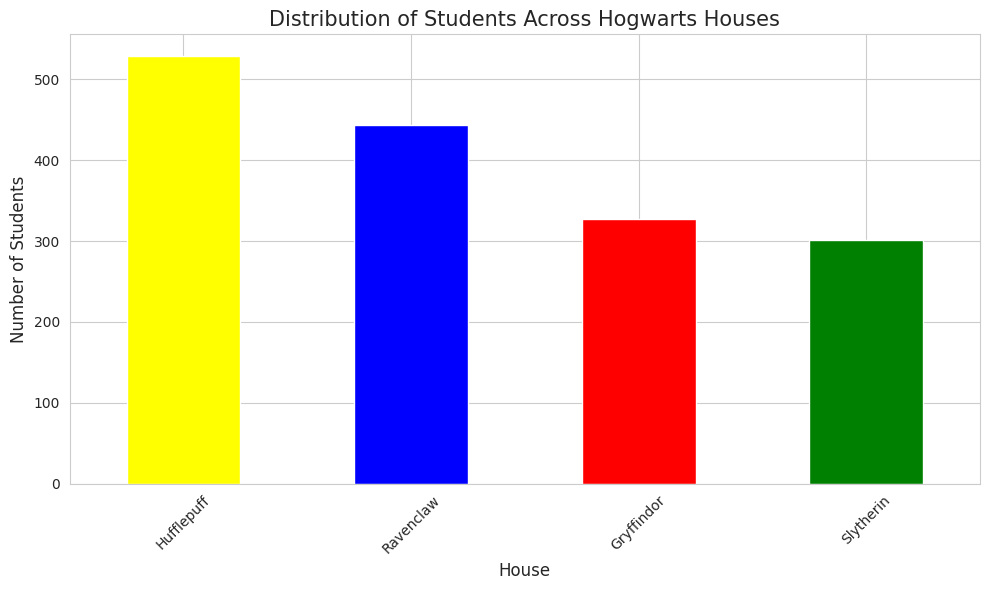

Total students: 1600
Hufflepuff: 529 students (33.1%)
Ravenclaw: 443 students (27.7%)
Gryffindor: 327 students (20.4%)
Slytherin: 301 students (18.8%)


In [5]:
house_counts = df['Hogwarts House'].value_counts()
colors = {
    'Gryffindor': 'red',
    'Hufflepuff': 'yellow',
    'Ravenclaw': 'blue',
    'Slytherin': 'green'
}

plt.figure(figsize=(10, 6))
house_counts.plot(kind='bar', color=[colors[house] for house in house_counts.index])
plt.title('Distribution of Students Across Hogwarts Houses', fontsize=15)
plt.xlabel('House', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total students: {house_counts.sum()}")
for house, count in house_counts.items():
    print(f"{house}: {count} students ({count/house_counts.sum()*100:.1f}%)")

## 2. Data Visualization & Feature Selection

- explore features to understand which ones are useful for classifying students.

In [6]:
from visualization.utils import HOUSE_COLORS

def plot_course_histogram(course):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        df,
        x=course,
        hue='Hogwarts House',
        palette=HOUSE_COLORS,
        element='step',
        multiple='layer'
    )
    plt.title(f"{course} Score Distribution by House", fontsize=15)
    plt.xlabel("Score", fontsize=12)
    plt.ylabel("Number of Students", fontsize=12)
    plt.tight_layout()
    plt.show()

The dataset shows a **homogeneous distribution** for the courses `Care of Magical Creatures` and `Arithmancy`. This indicates that the features may not provide meaningful separation between the Hogwarts houses.

Exclude this features from the training stage to avoid introducing noise or redundant information into the model.

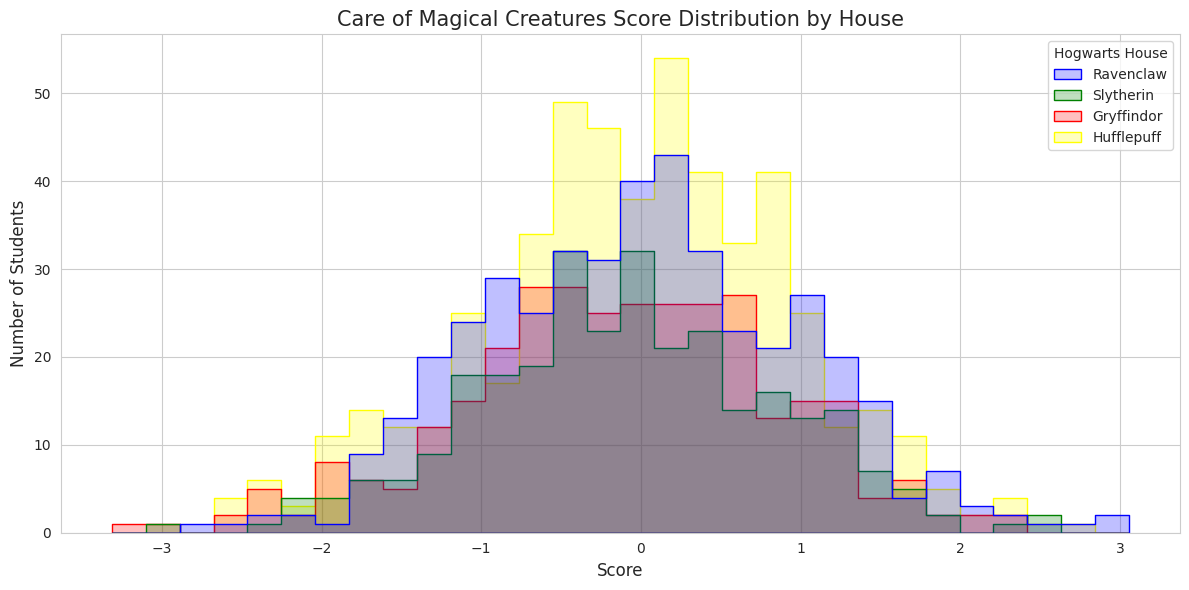

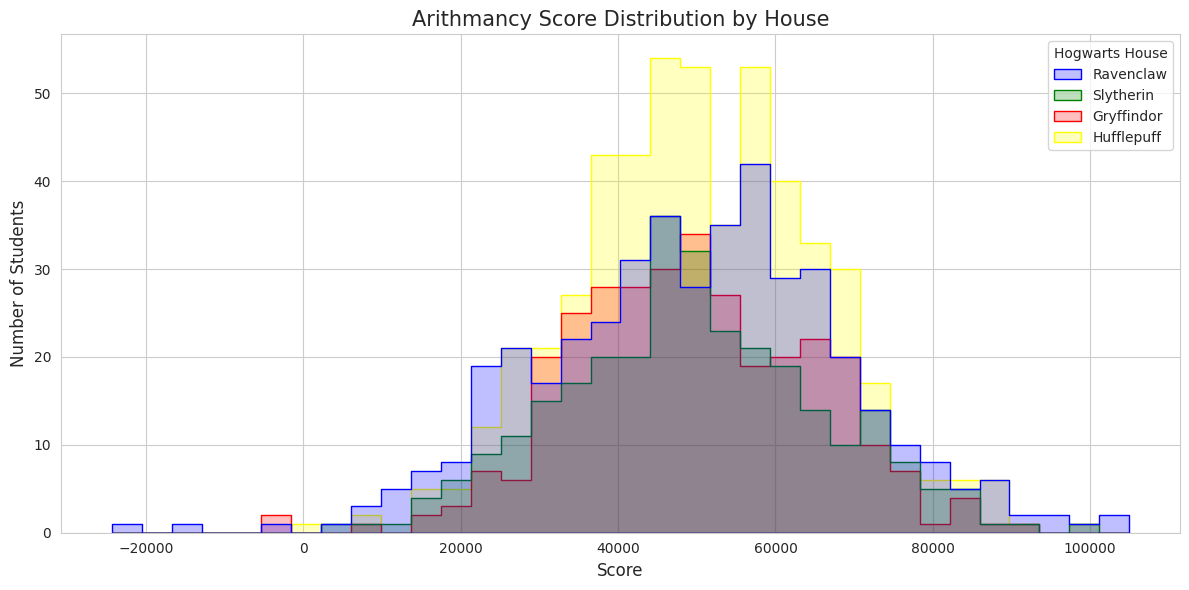

In [7]:
plot_course_histogram('Care of Magical Creatures')
plot_course_histogram('Arithmancy')

In [8]:
def create_scatter_plot(x_feature, y_feature):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=df,
        x=x_feature,
        y=y_feature,
        hue='Hogwarts House',
        palette=HOUSE_COLORS,
        alpha=0.7
    )
    plt.title(f"{x_feature} vs {y_feature}", fontsize=15)
    plt.xlabel(x_feature, fontsize=12)
    plt.ylabel(y_feature, fontsize=12)
    plt.tight_layout()
    plt.show()

Among all the data, the features **'Astronomy'** and **'Defense Against the Dark Arts'** are highly correlated. Including both in the training stage may introduce redundancy and noise into the model.

Using only one of these features is necessary.

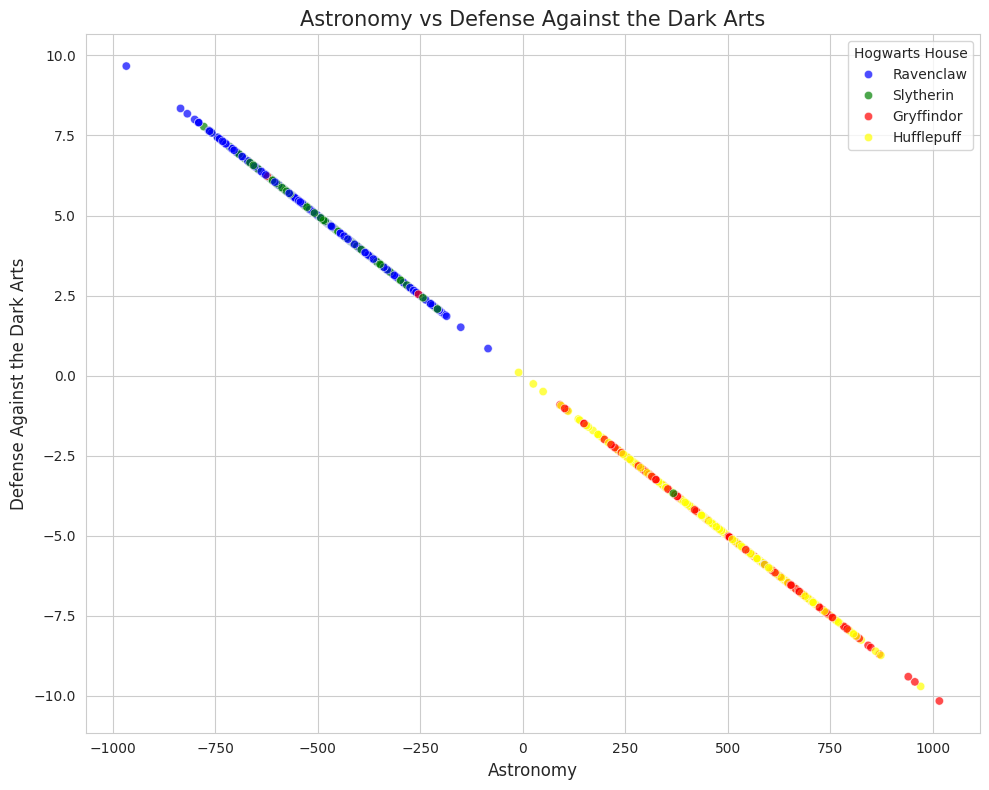

In [9]:
create_scatter_plot('Astronomy', 'Defense Against the Dark Arts')

Let's create a subset of the pair plot focusing on the most relevant features for classification.

## 3. Preprocess the Datasets

Prepare the dataset

In [10]:
TEST_DATASET = '../../data/raw/dataset_test.csv'

FEATURES_TO_DROP = [
    'Care of Magical Creatures',          # Homogeneous
    'Arithmancy',                         # Homogeneous
    'Defense Against the Dark Arts',      # Similar to Astronomy

    'First Name',                         # Not useful for analysis
    'Last Name',                          # Not useful for analysis
    'Birthday',                           # Not useful for analysis
    'Best Hand',                          # Not useful for analysis
    'Index'                               # Not useful for analysis
]

prediction_df = pd.read_csv(TEST_DATASET)
prediction_df.drop(columns=FEATURES_TO_DROP, inplace=True)
prediction_df.fillna(0.0, inplace=True)


raw_df = pd.read_csv(train_dataset_path)
processed_df = raw_df.drop(columns=FEATURES_TO_DROP)
processed_df.fillna(0.0, inplace=True)

processed_df.head()

,Hogwarts House,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
0,Ravenclaw,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89
1,Slytherin,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45
2,Ravenclaw,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42
3,Gryffindor,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64
4,Gryffindor,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98


In [11]:
from sklearn.preprocessing import StandardScaler

labels = processed_df['Hogwarts House']
features_df = processed_df.drop('Hogwarts House', axis=1)
prediction_features_df = prediction_df.drop('Hogwarts House', axis=1)

scaler = StandardScaler()
features = scaler.fit_transform(features_df)
prediction_features = scaler.transform(prediction_features_df)

## 4. Train Logistic Regression Models

Train the model using **Mini-Batch Gradient Descent**.

In [12]:
from models.train import train, TrainingConfig
import time

algo = "mini_batch_gradient_descent"

config = TrainingConfig()

print(f"\n--- Training with {algo} ---")
start = time.time()
weights = train(algo, features, labels, config)
duration = time.time() - start

f'Training completed in {duration:.2f} seconds'

2025-04-06 23:08:34,562 - Training for house: Gryffindor



--- Training with mini_batch_gradient_descent ---


Mini-batch GD Epochs: 100%|██████████| 1000/1000 [00:00<00:00, 2107.88it/s]
2025-04-06 23:08:35,041 - Training for house: Ravenclaw
Mini-batch GD Epochs: 100%|██████████| 1000/1000 [00:00<00:00, 2318.68it/s]
2025-04-06 23:08:35,476 - Training for house: Hufflepuff
Mini-batch GD Epochs: 100%|██████████| 1000/1000 [00:00<00:00, 2185.34it/s]
2025-04-06 23:08:35,936 - Training for house: Slytherin
Mini-batch GD Epochs: 100%|██████████| 1000/1000 [00:00<00:00, 2298.82it/s]


'Training completed in 1.81 seconds'

## 5: Evaluate Model Performance

Measure accuracy on the training set.

In [13]:
from models.predict import predict

predictions = predict(features, weights)

matches = predictions['Hogwarts House'] == labels.reset_index(drop=True)
accuracy = matches.sum() / len(matches) * 100
f'{matches.sum()} out of {len(matches)} predictions match the actual labels ({accuracy:.3f}%) on the training set.'

'1570 out of 1600 predictions match the actual labels (98.125%) on the training set.'

## 6: Predict and Export Results

Now run function **predict** on prepared dataset where students are not attached to **Hogwarts Houses**
Compare the results with scikit-learn Logistic Regression

In [14]:
predictions = predict(prediction_features, weights)

predictions.head()

,Hogwarts House
Index,
0,Hufflepuff
1,Ravenclaw
2,Gryffindor
3,Hufflepuff
4,Hufflepuff


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(processed_df.drop("Hogwarts House", axis=1))
y = processed_df["Hogwarts House"]

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_scaled, y)

sklearn_acc = accuracy_score(y, model.predict(X_scaled))
f"sklearn Logistic Regression accuracy on training dataset {sklearn_acc * 100:.3f}%"

'sklearn Logistic Regression accuracy on training dataset 98.188%'

Compare the results

In [16]:

sklearn_predictions = model.predict(prediction_features)
models_match = accuracy_score(predictions, sklearn_predictions)

f'{models_match * 100:.3f}% of the predictions match between the custom model and sklearn Logistic Regression'

'100.000% of the predictions match between the custom model and sklearn Logistic Regression'